# Individual Coding Exercise (ICE) 4 for HUDK4051: Learning Analytics

In this ICE 4,the following aspects of Recommender Systems are covered: building a sample content-based recommender and building a sample user-based collabortative filter.

## Recommender System

Recommender Systems (RSs) are software, tools, and techniques providing suggestions for items to be of use to a user. The suggestions relate to various decision-making processes: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow. In the educational world, the most common application of RSs is to recommend appropriate learning resources (e.g., readings, projects, practices, courses) to a learner.

## Building an RS for Learning Modules

Suppose that we have a self-guided LA course with seven units that learners can choose based on their preference. Our purpose in this ICE 4 is to make recommendations to learners based on their interest and preference. We have collected some ratings of the units from previous learners in terms of both interest and difficulty.

In [21]:
#importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

In [2]:
#uploading the datasets

interest = pd.read_csv("interest.csv")
difficulty = pd.read_csv("difficulty.csv")

In [3]:
#viewing the first 10 cases of the interest dataset
interest.head(10)

,id,prediction_interest,nlp_interest,sna_interest,neural_interest,viz_interest,loop_interest,sql_interest
0,s1,5,5.0,4,5.0,2,4.0,5.0
1,s2,5,5.0,5,5.0,5,5.0,5.0
2,s3,5,5.0,5,5.0,5,4.0,4.0
3,s4,4,5.0,5,5.0,5,5.0,5.0
4,s5,4,4.0,4,5.0,4,4.0,5.0
5,s6,5,5.0,5,5.0,5,5.0,5.0
6,s7,4,5.0,3,5.0,4,5.0,4.0
7,s8,4,4.0,3,4.0,5,4.0,4.0
8,s9,5,4.0,2,5.0,5,5.0,5.0
9,s10,5,5.0,5,5.0,5,4.0,5.0


In [4]:
#viewing the first 10 cases of the difficulty dataset
difficulty.head(10)

,id,prediction_difficulty,nlp_difficulty,sna_difficulty,neural_difficulty,viz_difficulty,loop_difficulty,sql_difficulty
0,s1,4,5.0,3,5.0,3.0,3.0,5.0
1,s2,5,5.0,5,5.0,5.0,5.0,5.0
2,s3,3,3.0,3,3.0,3.0,3.0,2.0
3,s4,3,4.0,4,4.0,4.0,5.0,3.0
4,s5,4,4.0,4,5.0,4.0,4.0,4.0
5,s6,5,5.0,5,5.0,5.0,5.0,5.0
6,s7,3,4.0,4,4.0,4.0,4.0,4.0
7,s8,4,5.0,4,4.0,4.0,5.0,4.0
8,s9,3,3.0,2,5.0,3.0,4.0,5.0
9,s10,3,5.0,3,4.0,4.0,5.0,2.0


In [5]:
#dropping null values from the dataset
int_clean = interest.dropna()
int_clean

,id,prediction_interest,nlp_interest,sna_interest,neural_interest,viz_interest,loop_interest,sql_interest
0,s1,5,5.0,4,5.0,2,4.0,5.0
1,s2,5,5.0,5,5.0,5,5.0,5.0
2,s3,5,5.0,5,5.0,5,4.0,4.0
3,s4,4,5.0,5,5.0,5,5.0,5.0
4,s5,4,4.0,4,5.0,4,4.0,5.0
5,s6,5,5.0,5,5.0,5,5.0,5.0
6,s7,4,5.0,3,5.0,4,5.0,4.0
7,s8,4,4.0,3,4.0,5,4.0,4.0
8,s9,5,4.0,2,5.0,5,5.0,5.0
9,s10,5,5.0,5,5.0,5,4.0,5.0


## Data Wrangling

In [9]:
avgs_d = {'prediction': 0, 'nlp': 0, 'sna': 0, 'neural': 0, 'viz': 0, 'loop': 0, 'sql': 0 }
length = len(diff_clean)

for index, row in diff_clean.iterrows():
    avgs_d['prediction'] += row.prediction_difficulty/length 
    avgs_d['nlp'] += row.nlp_difficulty/length 
    avgs_d['sna'] += row.sna_difficulty/length
    avgs_d['neural'] += row.neural_difficulty/length
    avgs_d['viz'] += row.viz_difficulty/length
    avgs_d['loop'] += row.loop_difficulty/length
    avgs_d['sql'] += row.sql_difficulty/length 

print(avgs_d)

{'prediction': 3.75, 'nlp': 4.187499999999999, 'sna': 3.729166666666667, 'neural': 4.375, 'viz': 4.020833333333334, 'loop': 4.083333333333334, 'sql': 3.6666666666666665}


In [10]:
avgs_i = {'prediction': 0, 'nlp': 0, 'sna': 0, 'neural': 0, 'viz': 0, 'loop': 0, 'sql': 0 }
length = len(int_clean)

for index, row in int_clean.iterrows():
    avgs_i['prediction'] += row.prediction_interest/length 
    avgs_i['nlp'] += row.nlp_interest/length 
    avgs_i['sna'] += row.sna_interest/length
    avgs_i['neural'] += row.neural_interest/length
    avgs_i['viz'] += row.viz_interest/length
    avgs_i['loop'] += row.loop_interest/length
    avgs_i['sql'] += row.sql_interest/length 

print(avgs_i)

{'prediction': 4.300000000000001, 'nlp': 4.420000000000001, 'sna': 4.100000000000002, 'neural': 4.4799999999999995, 'viz': 4.579999999999999, 'loop': 4.42, 'sql': 4.420000000000001}


In [11]:
data = [[avgs_d['prediction'], avgs_i['prediction']],
        [avgs_d['nlp'], avgs_i['nlp']], 
        [avgs_d['sna'], avgs_i['sna']],
        [avgs_d['neural'], avgs_i['neural']],
        [avgs_d['viz'], avgs_i['viz']],
        [avgs_d['loop'], avgs_i['loop']],
        [avgs_d['sql'], avgs_i['sql']]]

print(data)

difficulty_interest = pd.DataFrame(data, columns = ['difficulty', 'interest'], 
                      index = ['prediction', 'nlp', 'sna', 'neural', 'viz', 'loop', 'sql']) 

difficulty_interest

[[3.75, 4.300000000000001], [4.187499999999999, 4.420000000000001], [3.729166666666667, 4.100000000000002], [4.375, 4.4799999999999995], [4.020833333333334, 4.579999999999999], [4.083333333333334, 4.42], [3.6666666666666665, 4.420000000000001]]


,difficulty,interest
prediction,3.750000,4.30
nlp,4.187500,4.42
sna,3.729167,4.10
neural,4.375000,4.48
viz,4.020833,4.58
loop,4.083333,4.42
sql,3.666667,4.42


## Content-Based Recommender

Content-based recommenders suggest similar items based on a particular item. This system uses item metadata, such as ratings, description, comments, etc. to make these recommendations. The general idea behind these recommender systems is that if a person likes a particular item, they will also like an item that is similar to it. And to recommend that, it will make use of the user's past item metadata. A good example could be YouTube, where based on your history, it suggests you new videos that you could potentially watch.

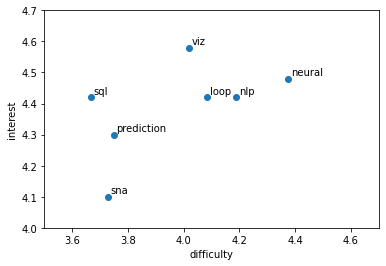

In [12]:
plt.scatter(difficulty_interest.difficulty, difficulty_interest.interest)

# Add lables to each point
for i, index in enumerate (difficulty_interest.index):
    plt.text(difficulty_interest.difficulty[i]+0.01, difficulty_interest.interest[i]+0.01, index)
    
# Adjust the axis limit and label
plt.xlim (3.5, 4.7)
plt.ylim (4.0, 4.7)
plt.xlabel("difficulty")
plt.ylabel("interest");

In [18]:
import math # You will need math library to calculate the eulidician distance

# Create a new column called distance. And assign 0 to all rows temporarily.
difficulty_interest_distance = difficulty_interest.copy()
difficulty_interest_distance['distance'] = 0

# Pick any row to start. Here I am using prediction as an example
item = difficulty_interest_distance.loc['prediction',]

# Loop around the data frame index; Obtain the target row; Calculate the distance
# Assign to d; And assign to the corresponding cell.
for i in difficulty_interest_distance.index:
    target = difficulty_interest_distance.loc[i,]
    d = math.dist(item, target)
    difficulty_interest_distance.loc[i, 'distance'] = d

# Sort the result by distance
difficulty_interest_distance.sort_values('distance', ascending=True)

,difficulty,interest,distance
prediction,3.750000,4.30,0.000000
sql,3.666667,4.42,0.146097
sna,3.729167,4.10,0.201082
loop,4.083333,4.42,0.354275
viz,4.020833,4.58,0.389552
nlp,4.187500,4.42,0.453659
neural,4.375000,4.48,0.650404


In [22]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(difficulty_interest)
cosine_sim

array([[1.        , 0.9991509 , 0.99978188, 0.99841221, 0.99999457,
        0.99958975, 0.99969565],
       [0.9991509 , 1.        , 0.99979344, 0.99988528, 0.99928124,
        0.99992104, 0.99783039],
       [0.99978188, 0.99979344, 1.        , 0.9993709 , 0.99984527,
        0.9999699 , 0.99896236],
       [0.99841221, 0.99988528, 0.9993709 , 1.        , 0.99859241,
        0.99961598, 0.99671869],
       [0.99999457, 0.99928124, 0.99984527, 0.99859241, 1.        ,
        0.9996787 , 0.99960893],
       [0.99958975, 0.99992104, 0.9999699 , 0.99961598, 0.9996787 ,
        1.        , 0.99857895],
       [0.99969565, 0.99783039, 0.99896236, 0.99671869, 0.99960893,
        0.99857895, 1.        ]])

Once we have the similarity matrix, the rest of the tasks are easy. We can encapsulate the recommendation procedure into one function. The function needs to:

- Get the index of the module given its title.

- Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position, and the second is the similarity score.

- Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.

- Get the top 5 elements of this list. Ignore the first element as it refers to self (the module is most similar to itself).

- Return the names corresponding to the indices of the top elements.

In [23]:
#creating an index for the module
module_indices = pd.Series(range(len(difficulty_interest.index)), index = difficulty_interest.index)

module_indices

prediction    0
nlp           1
sna           2
neural        3
viz           4
loop          5
sql           6
dtype: int64

In [24]:
def get_recommendations(name, cosine_sim, matrix_indices):
    #get the index of the movie that matches the title
    idx = matrix_indices[name]

    #get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    #sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    #get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:6]

    #get the movie indices
    rank_indices = [i[0] for i in sim_scores]

    #return the top 10 most similar movies
    return matrix_indices.iloc[rank_indices]

Now, we can make a quick query to find out which items are most similar to any given item. Based on the cosine similarity measure, this time `viz` is mostly similar to `prediction`. But the top four choice is quite similar to the nearest neighbor method measured by euclidean distance.

In [25]:
get_recommendations("prediction", cosine_sim, module_indices)

viz     4
sna     2
sql     6
loop    5
nlp     1
dtype: int64

The data do not have a whole lot of variabilities -- all the means are actually quite similar, so it is not surprising that the recommendations by two methods are not in the same order. Another important thing to make is that there are several additional similarity metrics that you can use for this, such as the manhattan and Pearson. But there is no right answer to which score is the best. Different scores work well in different scenarios. 

## Collaborative Filter

In constrast to content-based recommender, collaborative filter (CF) relies on the dynamic input of the user data and make recommendations. Collaborative filters can further be classified into two types:

- *Item-based Filtering*: This type of CF is extremely similar to the content recommendation engine that we have seen previously. Item-based CF identifies similar items based on how people have assessed it in the past. For example, if Alice, Bob, and Eve have given 5 stars to the prediction module and sql module, the system identifies the items as similar. Therefore, if someone buys prediction module, the system also recommends sql module to them. This assessment can change over time based on the incoming data and reflect the current trend. In contrast, content-based recommenders rely more on static and descriptive data. So in this sense, what we have built previously can also be called an item-based CF.

- *User-based Filtering*: This type of CT recommends item to a user that similar users have liked. For example, let's say Alice and Bob have a similar interest in prediction methods, sql, and neural networks -- they are similar people. The record shows that Alice also liked the SNA module, then we can infer that Bob probably will also like the SNA module.

The process is actually quite similar: Instead of evaluating on the similartity of content, we evaluate on the similarity of users. The following code evaluates the five most similar person to `s5` in descending order. On the other hand, if we arrange the interest in ascending order, we will get recommendations that is not necessarily the first choice, which is often referred as serendipity.

In [26]:
#clean up the dataset a little bit: Removing NaNs and naming rows
interest_na = interest.dropna()
interest_na.index = interest_na.id
interest_clean = interest_na.drop('id', axis=1)

In [27]:
#obtain the cosine similarity matrix
cosine_sim_interest = cosine_similarity(interest_clean, interest_clean)
#create an index for the student list
id_indices = pd.Series(range(len(interest_clean.index)), index = interest_clean.index)

In [28]:
#recycle the get_recommendations() that we have created
get_recommendations("s5", cosine_sim_interest, id_indices)

id
s2      1
s6      5
s12    11
s13    12
s16    15
dtype: int64